In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [130]:
df=pd.read_csv("AdmissionDataset/data.csv")
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
Y = df['Chance of Admit ']

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

In [132]:
X_test = (X_test - X_test.mean())/X_test.std()
X_train = (X_train - X_train.mean())/X_train.std()

In [133]:
X_train_c = X_train
ones = np.ones([X_train_c.shape[0],1])

In [134]:
X_train_c = np.concatenate((ones,X_train_c),axis=1)

In [135]:
Y_train_c = pd.DataFrame(Y_train)
Y_train_c = Y_train_c.values

In [136]:
theta = np.zeros([1,8])

In [137]:
alpha = 0.01
iters = 1000

In [138]:
def gradientDescent(X,y,theta,iters,alpha):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
    
    return theta

In [139]:
g = gradientDescent(X_train_c,Y_train_c,theta,iters,alpha)

In [140]:
theta=g[0]
y_pred=[]
for index,row in X_train.iterrows():
    row=list(row)
    y1=0
    for i in range(0,7):
        y1 = y1 + theta[i+1]*row[i]
    y1=y1+theta[0]
    y_pred.append(y1)

In [141]:
# Y_train

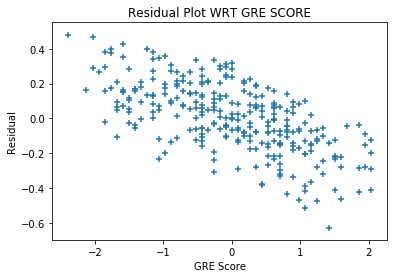

In [142]:
X_train_1 = X_train['GRE Score']
prediction_df = pd.DataFrame({
    'prediction': y_pred
})
prediction_df['prediction']=Y_train-prediction_df['prediction']
result=prediction_df['prediction']
figure()
scatter(X_train_1,result,marker='+' )
xlabel('GRE Score')
ylabel('Residual')
title('Residual Plot WRT GRE SCORE')
show()

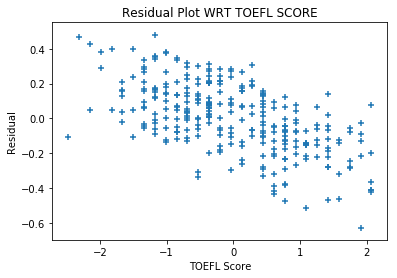

In [143]:
X_train_1 = X_train['TOEFL Score']
prediction_df=pd.DataFrame({
    'prediction': y_pred
})
prediction_df['prediction']=Y_train-prediction_df['prediction']
result=prediction_df['prediction']
figure()
scatter(X_train_1,result,marker='+' )
xlabel('TOEFL Score')
ylabel('Residual')
title('Residual Plot WRT TOEFL SCORE')
show()